# Load predictions

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
import cmcrameri
import sys
import numpy as np
sys.path.append("../../")

In [16]:
measures = ["log", "var", "crps", "kernel"]
experiment = "yacht"
dist = [0.00,0.2,0.5,1.5,2.5,5.0]

In [17]:
df = pd.read_pickle(f"../../results/robustness/results/{experiment}_au.pkl")
df

0.0       0.1        0.2        0.3       0.4         0.5  \
5  log     0.003027  0.024899   0.050333   0.052716   0.04976     0.08971   
   var     0.020471  4.490265  10.187267  41.410137  4.892467  136.774551   
   crps    0.010692  0.339528   0.697086   1.156911  0.579831    2.554729   
   kernel   0.00633  0.074425   0.117241   0.120718  0.118533    0.140544   
25 log     0.000862  0.005605   0.011656   0.012194  0.011513    0.020751   
   var     0.006005  1.006309   2.247749   9.285711  1.093464   28.765043   
   crps    0.003095  0.076768   0.158612   0.263538  0.131988    0.574589   
   kernel  0.001774  0.016651   0.026521   0.027306  0.026808    0.031833   

                 0.6         0.7         0.8          0.9  ...         1.7  \
5  log      0.079893    0.092009    0.091457     0.103155  ...    0.130865   
   var     93.336807  700.665649  102.474297  2182.195068  ...   3513.2771   
   crps     1.914785    5.194706    2.410476      7.17993  ...   12.132109   
   kernel   0.137034    0.142505    0.142898     0.143058  ...    0.149913   
25 log      0.018483     0.02128    0.021137     0.023829  ...     0.03022   
   var     19.476337  157.808655   22.456051    511.23587  ...  771.786804   
   crps     0.431279    1.186952    0.548399     1.657702  ...    2.757877   
   kernel   0.031038    0.032295     0.03238     0.032421  ...    0.033984   

                    1.8           1.9          2.0           2.5  \
5  log         0.149101      0.125035     0.131678      0.156402   
   var     47011.476562  31874.037109  9919.579102  28274.753906   
   crps       34.656982     18.300936    16.068216     30.686789   
   kernel      0.153101      0.149972     0.148327      0.155162   
25 log          0.03445      0.028893     0.030368       0.03613   
   var     10456.686523   7152.869141  2387.084717   6420.124023   
   crps        7.914577      4.167654     3.761793       6.99645   
   kernel      0.034711      0.033995     0.033633      0.035183   

                    3.0           3.5           4.0           4.5  \
5  log         0.162722      0.173817      0.174334      0.185949   
   var     24391.095703  95616.601562  20640.201172  184090.84375   
   crps       32.937138     59.427273     33.905075     89.201942   
   kernel      0.152791      0.153945      0.156497      0.155147   
25 log         0.037571      0.040105      0.040238      0.042923   
   var      5285.893555  21841.619141   4667.539551  41471.722656   
   crps        7.446106     13.705293      7.761077     20.384869   
   kernel      0.034638      0.034909       0.03549      0.035176   

                    5.0  
5  log         0.186252  
   var     257515.34375  
   crps      101.941612  
   kernel      0.156169  
25 log         0.043004  
   var     61041.035156  
   crps       23.641582  
   kernel      0.035417  

[8 rows x 27 columns]

In [18]:
print((df.loc[:,dist]*100).astype("float").to_latex(float_format="%.2g"))

\begin{tabular}{llrrrrrr}
\toprule
 &  & 0.000000 & 0.200000 & 0.500000 & 1.500000 & 2.500000 & 5.000000 \\
\midrule
\multirow[t]{4}{*}{5} & log & 0.3 & 5 & 9 & 12 & 16 & 19 \\
 & var & 2 & 1e+03 & 1.4e+04 & 9.9e+05 & 2.8e+06 & 2.6e+07 \\
 & crps & 1.1 & 70 & 2.6e+02 & 1.3e+03 & 3.1e+03 & 1e+04 \\
 & kernel & 0.63 & 12 & 14 & 15 & 16 & 16 \\
\cline{1-8}
\multirow[t]{4}{*}{25} & log & 0.086 & 1.2 & 2.1 & 2.8 & 3.6 & 4.3 \\
 & var & 0.6 & 2.2e+02 & 2.9e+03 & 2.1e+05 & 6.4e+05 & 6.1e+06 \\
 & crps & 0.31 & 16 & 57 & 3e+02 & 7e+02 & 2.4e+03 \\
 & kernel & 0.18 & 2.7 & 3.2 & 3.4 & 3.5 & 3.5 \\
\cline{1-8}
\bottomrule
\end{tabular}



In [19]:
plt.style.use(['science','grid'])
ticksize = 20
legendsize = 22
labelsize = 22

cmap = plt.get_cmap('cmc.roma_r')
colors = [cmap(x) for x in np.linspace(0,0.95,4)]

In [20]:
names = [r"$S_\mathrm{log}$",r"$S_\mathrm{SE}$",r"$S_\mathrm{ES}$",r"$S_{k_\gamma}$"]

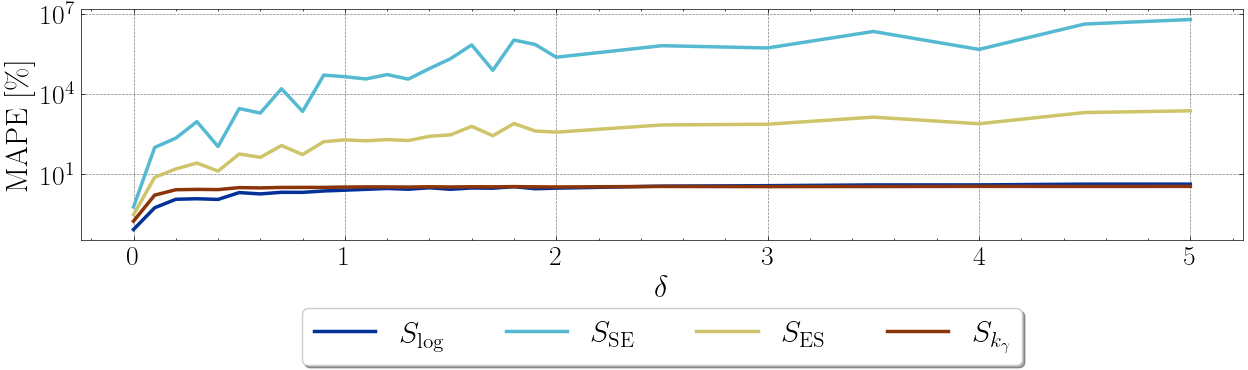

In [21]:
ens = 25
fig, axs = plt.subplots(1,1, figsize=(15,3))
for m,measure in enumerate(measures):
    axs.plot(df.columns.values,df.loc[(ens, measure)].values*100, label = names[m], lw = 2.5, color = colors[m])
    
axs.set_yscale("log")
axs.xaxis.set_tick_params(labelsize=ticksize)
axs.yaxis.set_tick_params(labelsize=ticksize)

# Only include legend for yacht plot
if experiment == "yacht":
    axs.legend(loc='upper center', bbox_to_anchor=(0.5, -0.23),
            fancybox=True, shadow=True, ncol=4, fontsize = legendsize)
    axs.set_xlabel(r"$\delta$", fontsize = labelsize)
axs.set_ylabel("MAPE [\%]", fontsize = labelsize)

plt.savefig(f"../../plots/robustness_{experiment}.pdf", bbox_inches = "tight")